In [1]:
import os
import numpy as np
import pandas as pd
import time
import visual_behavior.database as db
import datetime
pd.set_option('display.max_columns', 500)
import visual_behavior.data_access.loading as loading
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior import database as db
import matplotlib.pyplot as plt
import seaborn as sns

%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [10]:
%%time
glm_version = '8a_L2_optimize_by_session'
experiment_table = gat.get_experiment_table(glm_version=glm_version)

CPU times: user 1min 13s, sys: 6.94 s, total: 1min 20s
Wall time: 2min


## some jobs don't have sufficient walltime to complete

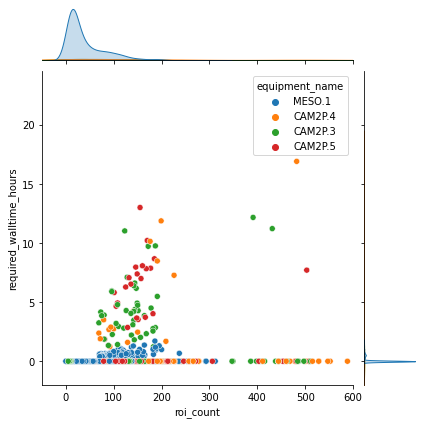

In [7]:
sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_walltime_hours',
    hue='equipment_name',
    xlim = (-50,600),
    ylim=(-2,24.5),
)

## it also looks like some jobs are running out of memory

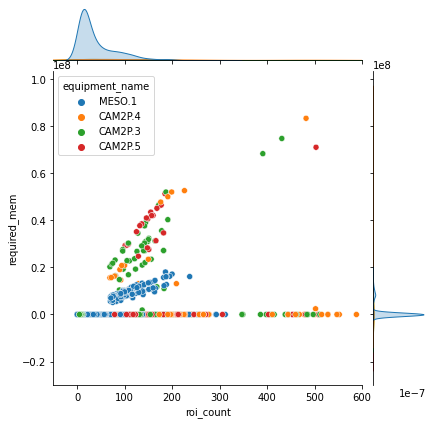

In [8]:
sns.jointplot(
    data = experiment_table.fillna(0),
    x='roi_count',
    y='required_mem',
    hue='equipment_name',
    xlim = (-50,600),
#     ylim=(-2,24.5),
)

In [7]:
experiment_table['required_mem'].max()

67108864

In [9]:
experiment_table

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,roi_count,_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc,required_walltime_seconds,required_walltime_minutes,required_walltime_hours,dropout_count
0,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225,True,2,15,5f85d8d944396b639f666118,8a_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-10-12 20:43:24-07:00,00:00:15,149252.0,0.0,2020-10-13 16:42:00.937087,15.0,0.250000,0.004167,NaN
1,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150,True,2,23,5f85d8d8b7ebf9443011ad48,8a_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-10-12 20:30:32-07:00,00:00:13,147324.0,527576.0,2020-10-13 16:42:00.356391,13.0,0.216667,0.003611,NaN
2,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75,True,2,11,5f85d8d83382b73c63aec64d,8a_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-10-12 20:53:50-07:00,00:00:14,149204.0,0.0,2020-10-13 16:42:00.379516,14.0,0.233333,0.003889,NaN
3,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,container_qc,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225,True,2,14,5f85d8d82e8ff087307f1881,8a_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-10-12 20:43:24-07:00,00:00:15,149244.0,1916076.0,2020-10-13 16:42:00.355472,15.0,0.250000,0.004167,NaN
4,958527485,954954402,953982960,1018028351,VisualBehaviorMultiscope,container_qc,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISl,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISl_75,True,3,8,5f85d8d829197a886b347ae4,8a_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-10-12 21:02:09-07:00,00:00:17,202100.0,1911540.0,2020-10-13 16:42:00.325993,17.0,0.283333,0.004722,NaN
...,...,...,...,...,...,...,.